In [1]:
kos = '../out/rev_sequencing_kos.tsv'

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
import numpy as np
import pandas as pd

In [4]:
inter = pd.read_csv(kos, sep='\t')

In [5]:
inter['size'] = inter['stop'] - inter['start']

In [6]:
inter = inter[inter['size'] > 100]

In [7]:
ci = inter.groupby(['target', 'strain'])['set'].nunique()
ci = ci[ci == 2]

In [8]:
inter = inter.set_index(['target', 'strain']).loc[ci.index].reset_index()

In [9]:
niter = inter.groupby(['set', 'strain', 'gene'])['sample'].count().loc['new']
oiter = inter.groupby(['set', 'strain', 'gene'])['sample'].count().loc['original']

In [10]:
m = niter.to_frame().join(oiter.to_frame(),
                          how='outer',
                          lsuffix='_new',
                          rsuffix='_original')
m[np.isnan(m)] = 0.0

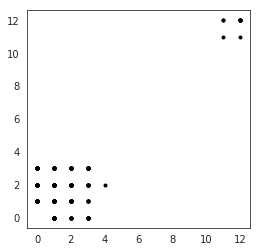

In [11]:
plt.figure(figsize=(4, 4))

plt.plot(m['sample_original'],
         m['sample_new'],
         'k.');

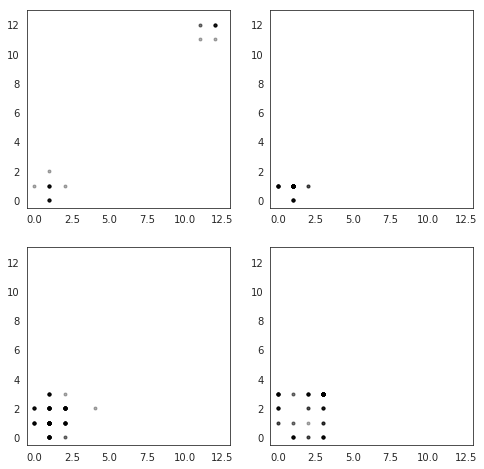

In [12]:
plt.figure(figsize=(8, 8))

for i, strain in enumerate(['S288C',
                            'Y55',
                            'YPS606',
                            'UWOPS87']):
    plt.subplot(2, 2, i+1)
    plt.plot(m.loc[strain]['sample_original'],
             m.loc[strain]['sample_new'],
             'k.',
             alpha=0.3)
    
    plt.xlim(-0.5, 13)
    plt.ylim(-0.5, 13);

In [13]:
g = None
for gene in ['URA3', 'CAN1', 'LYP1', 'LEU2', 'MET17']:
    x = inter[inter['name'].isin([gene])
             ].groupby(['strain', 'set'])['sample'
             ].nunique() / inter.groupby(['strain', 'set'])[
             'sample'].nunique()
    x[np.isnan(x)] = 0.0
    x.name = gene
    if g is None:
        g = x.to_frame()
    else:
        g = g.join(x.to_frame(), how='outer')

In [14]:
g

URA3  CAN1  LYP1      LEU2     MET17
strain  set                                               
S288C   new       0.916667   0.0   0.0  1.000000  1.000000
        original  1.000000   0.0   0.0  1.000000  0.916667
UWOPS87 new       1.000000   0.0   0.0  0.000000  0.000000
        original  1.000000   1.0   1.0  0.666667  0.000000
Y55     new       0.000000   0.0   0.0  0.000000  0.000000
        original  0.000000   1.0   1.0  0.000000  0.000000
YPS606  new       0.500000   0.0   0.0  0.000000  0.000000
        original  1.000000   1.0   1.0  0.000000  0.000000